In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
# matplotlib inline

In [29]:
class OurOwnSVM:
    def __init__(self, C=1.0):
        self.C = C
        
    def our_objective_fn(self, margins):
        obj_fun_val = 0.5 * self.w.dot(self.w) + self.C * np.maximum(0, 1-margins).sum()
        
    def fit_SVM(self,X,Y,lr=1e-05, num_epochs=500):
        N, D = X.shape
        self.N = N
        self.w = np.random.randn(D)
        self.b = 0
        
        #gradient descent calculation
        losses=[]
        for epoch_iter in range(num_epochs):
            margins= Y*self.our_decision_fn(X)
            loss=self.our_objective_fn(margins)
            losses.append(loss)
            
            idx = np.where(margins < 1)[0]
            delta_w = self.w - self.C * Y[idx].dot(X[idx])
            self.w -=  (lr * delta_w)
            delta_b = -self.C * Y[idx].sum()
            self.b -= lr * delta_b 
            
        print("w:", self.w)
        print("b:", self.b)
        
        #plot the loss
        #print(losses)
        plt.plot(losses)
        plt.title("loss per iteration")
        plt.show()
            
        
    def our_decision_fn(self, X):
        return X.dot(self.w) + self.b
        
    def predict_SVM(self, X):
        return np.sign(self.our_decision_fn(X))
    
    def scoring(self,X,Y):
        y_pred = self.predict_SVM(X)
        precision_rate = np.mean(y_pred == Y)
        return precision_rate
        
def load_custom_data():
    Xtrain = np.array([[-2,4],[4,1],[1,6],[2,4],[6,2]])
    Ytrain = np.array([-1,-1,1,1,1])
    Xtest = np.array([[-1,3],[5,5]])
    Ytest = np.array([-1,1])
    return Xtrain, Xtest, Ytrain, Ytest, 1e-03, 10000

def plot_decision_boundary(model, X, Y, resolution=100, colors=('b', 'k', 'r')):
    np.warnings.filterwarnings('ignore')
    fig, ax = plt.subplots()

    # Generate coordinate grid of shape [resolution x resolution]
    # and evaluate the model over the entire space
    x_range = np.linspace(X[:,0].min(), X[:,0].max(), resolution)
    y_range = np.linspace(X[:,1].min(), X[:,1].max(), resolution)
    grid = [[model.our_decision_fn(np.array([[xr, yr]])) for yr in y_range] for xr in x_range]
    grid = np.array(grid).reshape(len(x_range), len(y_range))

    # Plot decision contours using grid and
    # make a scatter plot of training data
    ax.contour(x_range, y_range, grid.T, (-1, 0, 1), linewidths=(1, 1, 1),
             linestyles=('--', '-', '--'), colors=colors)
    ax.scatter(X[:,0], X[:,1],
             c=Y, lw=0, alpha=0.3, cmap='seismic')

    

    plt.show()
    
        

Correct test labels: [-1 -1  1  1  1]
w: [0.50029108 1.00049116]
b: -4.017999999999978


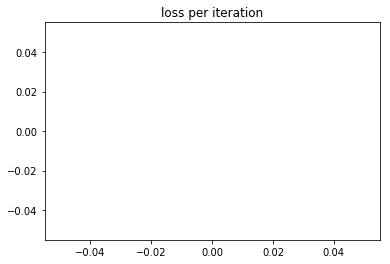

In [14]:
#load data

Xtrain, Xtest, Ytrain, Ytest, lr, num_epochs = load_custom_data()
print("Correct test labels:", Ytrain)

model = OurOwnSVM(C=1.0)
model.fit_SVM(Xtrain,Ytrain,lr,num_epochs)

In [15]:
Y_pred=model.predict_SVM(Xtest)
print(Y_pred)

[-1.  1.]


In [17]:
print("train score:", model.scoring(Xtrain,Ytrain))
print("test score", model.scoring(Xtest, Ytest))

train score: 1.0
test score 1.0


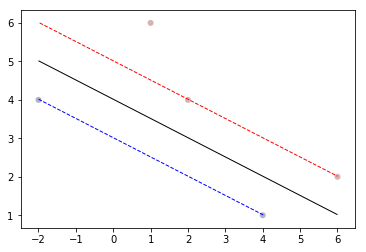

In [30]:
plot_decision_boundary(model, Xtrain, Ytrain)

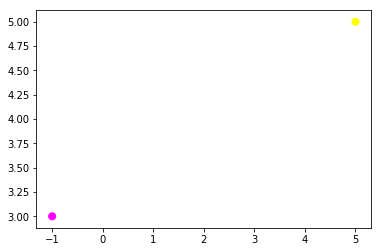

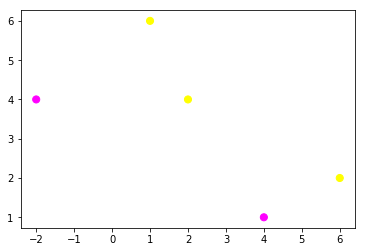

In [33]:
# plotting scatters  
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=Y_pred, s=50, cmap='spring'); 
plt.show()

plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=Ytrain, s=50, cmap='spring'); 
plt.show()

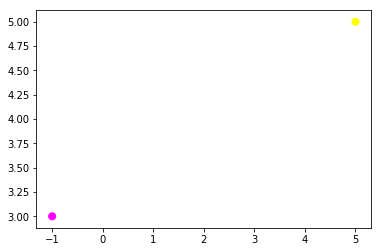

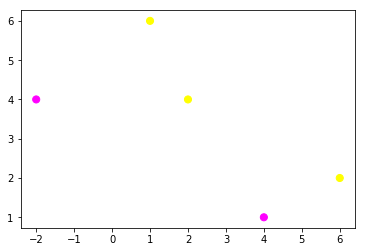

In [32]:
#Now let us use SVM prediction and predict the class

# import support vector classifier 
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(Xtrain, Ytrain) 

Y_pred = clf.predict(Xtest)

# plotting scatters  
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=Y_pred, s=50, cmap='spring'); 
plt.show()

plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=Ytrain, s=50, cmap='spring'); 
plt.show()